In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


<AxesSubplot:xlabel='X', ylabel='Y'>

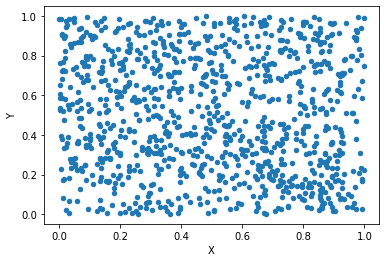

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [3]:
X = np.random.uniform(0,1,1000)
X

array([8.16795433e-02, 7.69011298e-01, 2.89817074e-01, 9.82061310e-01,
       2.77312938e-01, 4.03745770e-01, 3.43835811e-01, 1.04587915e-01,
       8.64962617e-01, 8.17567202e-01, 4.99267087e-01, 1.47146631e-01,
       7.32589470e-01, 3.08234551e-01, 5.87882095e-02, 6.99778546e-01,
       6.59380150e-01, 5.97934289e-01, 9.72234614e-01, 4.67804374e-01,
       2.37228722e-01, 5.89759721e-01, 7.44737000e-01, 7.87233290e-01,
       1.38890519e-01, 9.89029491e-01, 2.98285738e-01, 6.54305616e-01,
       9.45614563e-02, 4.21766602e-02, 5.38634018e-01, 9.72209122e-01,
       8.91401604e-01, 7.54374132e-01, 6.76432714e-01, 7.74956937e-01,
       7.48934050e-01, 2.89667070e-01, 6.97240263e-01, 5.27601808e-01,
       6.91782444e-02, 2.31646736e-01, 8.44267416e-01, 1.47305417e-01,
       4.95467466e-01, 6.14437192e-01, 3.89273421e-01, 7.17123778e-01,
       8.25330092e-01, 2.99219405e-01, 8.41846459e-01, 2.02681985e-01,
       5.26865730e-01, 2.86417927e-01, 8.64064804e-01, 6.77962395e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

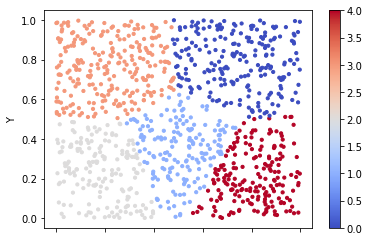

In [4]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [5]:
Univ = pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\ExcelR\Python Intro\Clustering\Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])


df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [7]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([4, 3, 2, 4, 4, 1, 1, 4, 1, 3, 1, 4, 4, 0, 1, 0, 1, 0, 2, 4, 2, 4,
       4, 0, 1])

In [8]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [9]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
2,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667


In [10]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,4
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4
